Name: Odita Samuel



Purpose: Data Cleaning and Analysis

Date: 03/01/24

In [1]:
#LOADING ALL NEEDED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



# Stops warnings from showing (happens with a couple of plots)
import warnings
warnings.simplefilter('ignore')

# DATA IMPORTATION, MANIPULATION AND CLEANING


In [3]:
column_names = ["age", "job", "marital", "education", "default", "housing", "loan", "contact", "month",
                "day_of_week", "duration", "campaign", "pdays", "previous", "poutcome",
                "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y"]
#Importing of the Dataset
BankMarketing = pd.read_csv(r"C:\Users\sieve\Desktop\PYTHON\bank-additional-full.csv", sep=';', header=None, names=column_names, skiprows=1, quoting=3)
# Remove double quotation marks from all columns
# Convert 'age' column to strings and remove double quotation marks
BankMarketing['age'] = BankMarketing['age'].astype(str).str.replace('"', '')

# Remove double quotation marks from specified columns
columns_to_clean = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
BankMarketing[columns_to_clean] = BankMarketing[columns_to_clean].apply(lambda x: x.str.replace('"', ''))
# Converting all necessary columns to integer
BankMarketing['age'] = pd.to_numeric(BankMarketing['age'], errors='coerce').astype('Int64')

columns_to_convert_to_int = ['duration', 'campaign', 'pdays', 'previous']
BankMarketing[columns_to_convert_to_int] = BankMarketing[columns_to_convert_to_int].astype(int)

# Converting all necessary columns to float
columns_to_convert_to_float = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
BankMarketing[columns_to_convert_to_float] = BankMarketing[columns_to_convert_to_float].astype(float)

#Mapping of dates
days_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}

BankMarketing['day_of_week'] = BankMarketing['day_of_week'].map(days_mapping).astype('int64')




In [4]:
# Get a feel for the data
print(BankMarketing.head())
print()
print(BankMarketing.tail())
print()
print(BankMarketing.info())
print()

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month  day_of_week  ...  campaign  pdays  previous     poutcome  \
0   may            1  ...         1    999         0  nonexistent   
1   may            1  ...         1    999         0  nonexistent   
2   may            1  ...         1    999         0  nonexistent   
3   may            1  ...         1    999         0  nonexistent   
4   may            1  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.1          93.994          -36.4      4

In [5]:
# Checking for missing values in the DataFrame
missing_values = BankMarketing.isnull().sum()

print("Missing values per column:")
print(missing_values)




Missing values per column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [6]:
# Drop rows with missing values (if any)
cleanBankMarketing = BankMarketing.dropna(axis=0)

# Display the updated DataFrame info
print(cleanBankMarketing.info())

# ReCheck for missing values in the entire DataFrame
missing_values = cleanBankMarketing.isnull().sum()

print("Missing values per column:")
print(missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  Int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int32  
 11  campaign        41188 non-null  int32  
 12  pdays           41188 non-null  int32  
 13  previous        41188 non-null  int32  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

SUMMARY STATISTICS

In [7]:
print(cleanBankMarketing.describe())
#Exploring Unique values columns
for column in cleanBankMarketing.select_dtypes(include='object').columns:
    print(f"Unique values in {column}: {cleanBankMarketing[column].unique()}")

               age   day_of_week      duration      campaign         pdays  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406      2.979581    258.285010      2.567593    962.475454   
std       10.42125      1.411514    259.279249      2.770014    186.910907   
min       17.00000      1.000000      0.000000      1.000000      0.000000   
25%       32.00000      2.000000    102.000000      1.000000    999.000000   
50%       38.00000      3.000000    180.000000      2.000000    999.000000   
75%       47.00000      4.000000    319.000000      3.000000    999.000000   
max       98.00000      5.000000   4918.000000     56.000000    999.000000   

           previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
count  41188.000000  41188.000000    41188.000000   41188.000000   
mean       0.172963      0.081886       93.575664     -40.502600   
std        0.494901      1.570960        0.578840       4.628198   
min        0.000000     -

DATA VISUALISATION

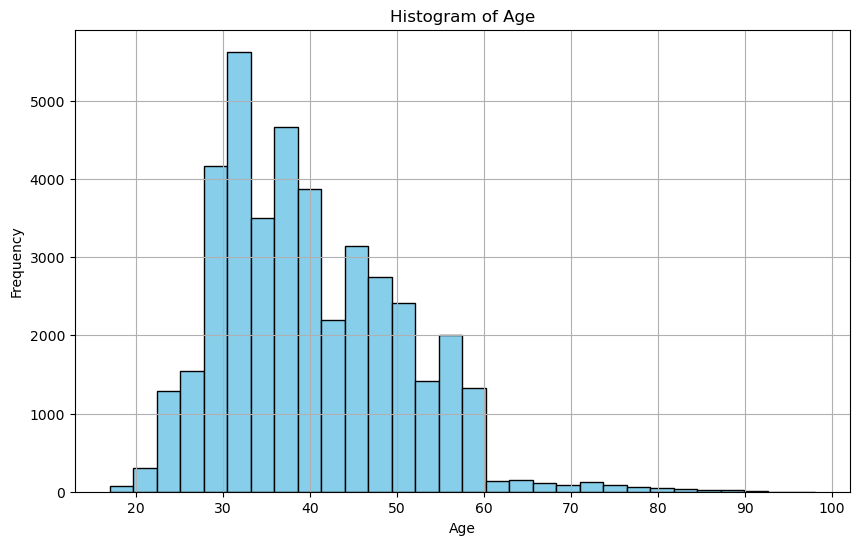

In [8]:
# Histogram of age column
cleanBankMarketing['age'].hist(figsize=(10, 6), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### DATA SAMPLING

In [10]:
# Set a random seed for reproducibility
random_seed = 42

# Randomly sample 20% of the data
sampledbankmarketing = cleanBankMarketing.sample(frac=0.2, random_state=random_seed)

# Print the sampled data
print("Original Data Shape:", cleanBankMarketing.shape)
print("Sampled Data Shape:", sampledbankmarketing.shape)

Original Data Shape: (41188, 21)
Sampled Data Shape: (8238, 21)


### CORRELATION MATRIX AND DATA VISUALISATION

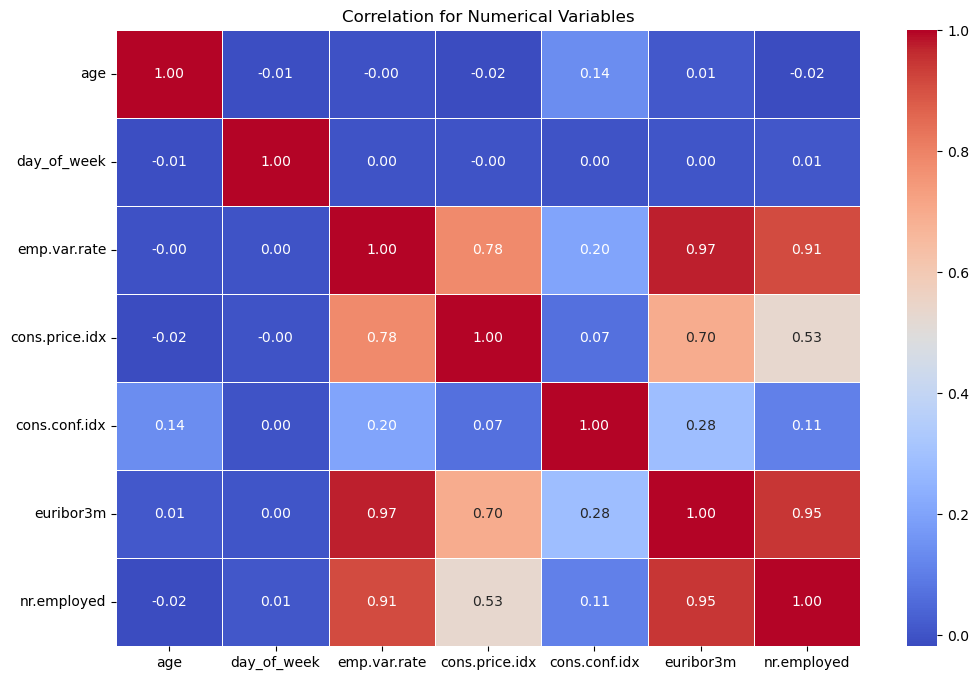

In [12]:
# select only the numeric columns
numeric_columns = sampledbankmarketing.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Show the plot
plt.title('Correlation for numerical variables')
plt.show()

### CATEGORICAL VARIABLE ANALYSIS

In [14]:
categorical_features=[feature for feature in sampledbankmarketing.columns if ((sampledbankmarketing[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [15]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(sampledbankmarketing[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 4
The feature is education and number of categories are 8
The feature is default and number of categories are 2
The feature is housing and number of categories are 3
The feature is loan and number of categories are 3
The feature is contact and number of categories are 2
The feature is month and number of categories are 10
The feature is poutcome and number of categories are 3


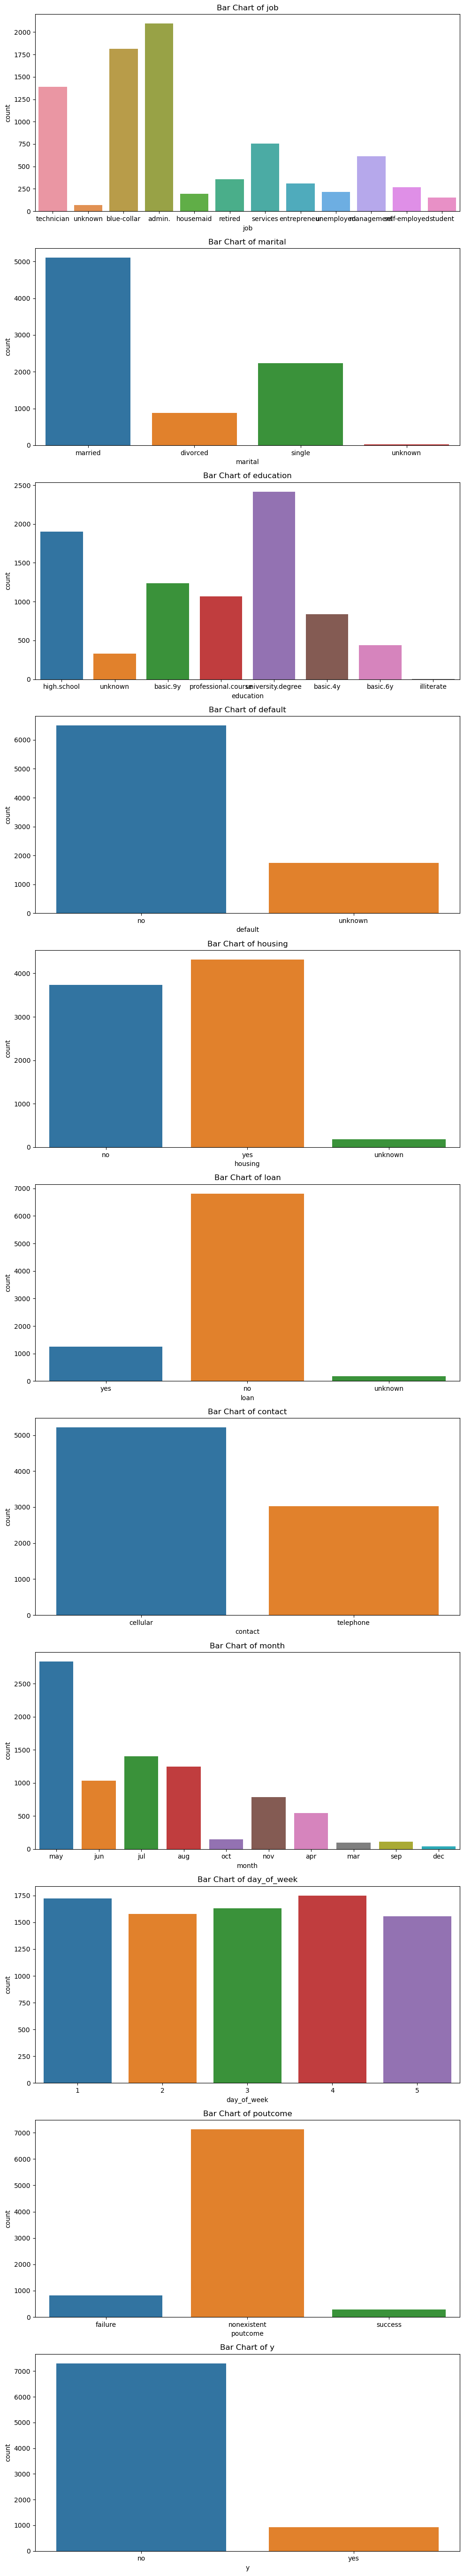

In [17]:
# list of categorical variable names
categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_variables), ncols=1, figsize=(10, 5 * len(categorical_variables)))

# Plot bar charts for each categorical variable
for i, variable in enumerate(categorical_variables):
    sns.countplot(x=variable, data=sampledbankmarketing, ax=axes[i])
    axes[i].set_title(f'Bar Chart of {variable}')

# Adjust layout
plt.tight_layout()
plt.show()

### Relationship between Categorical Features and Label

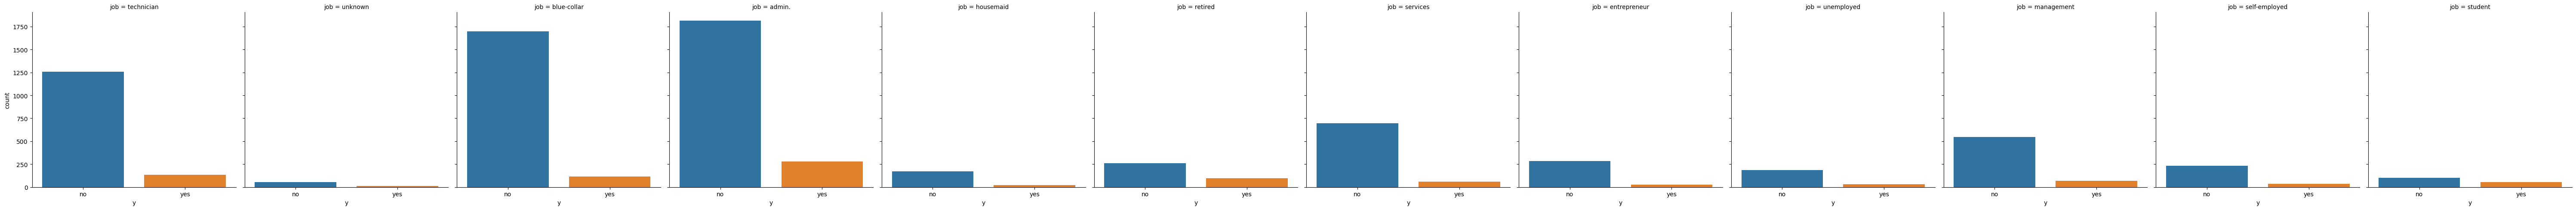

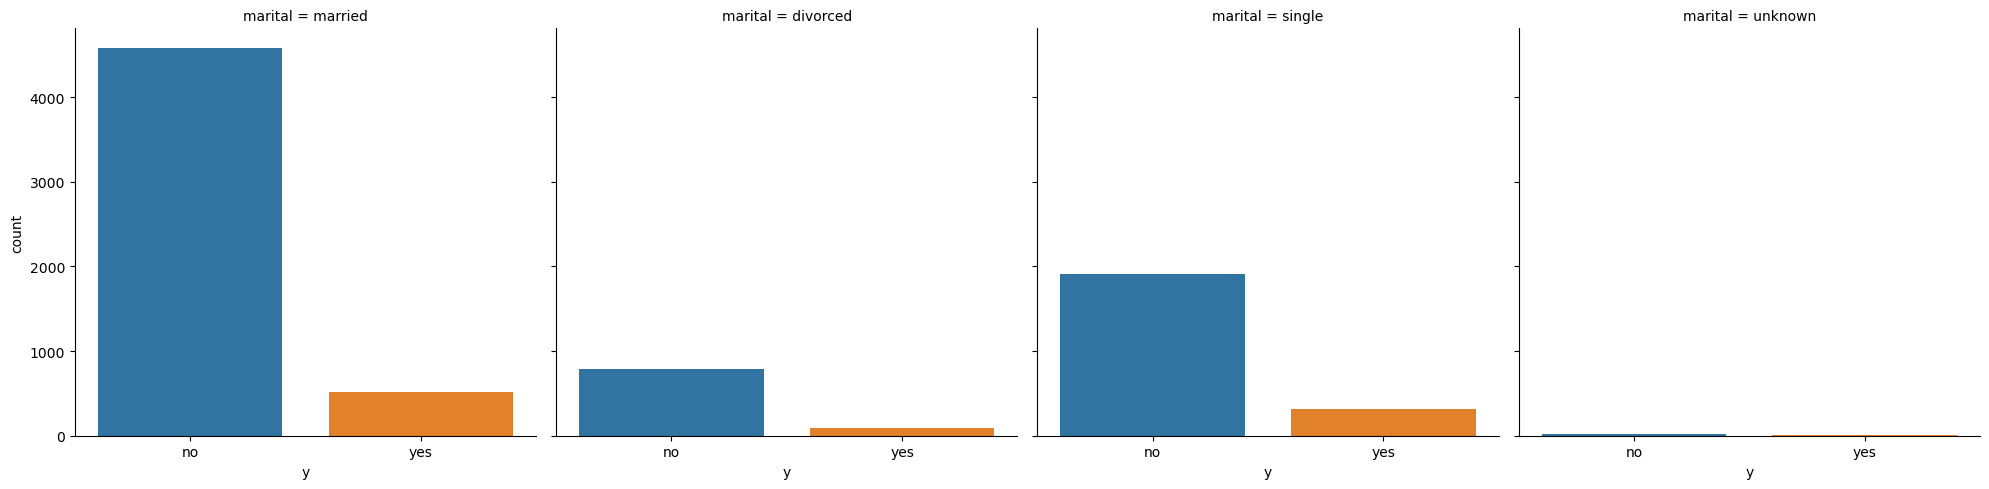

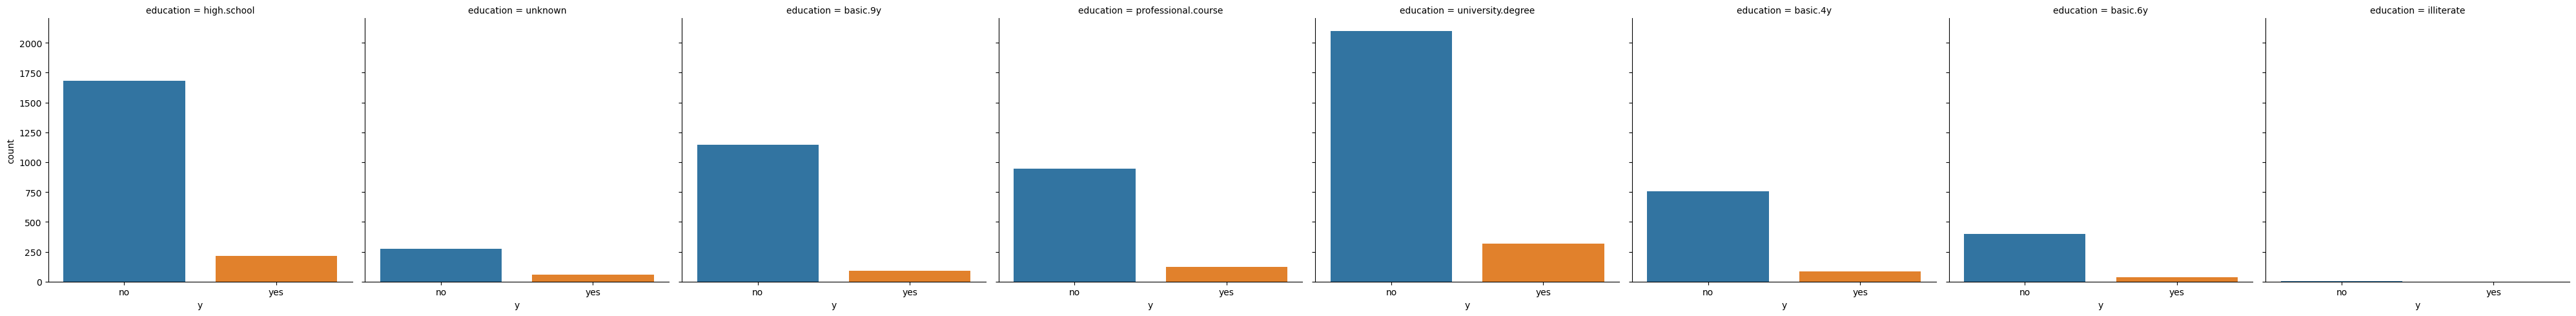

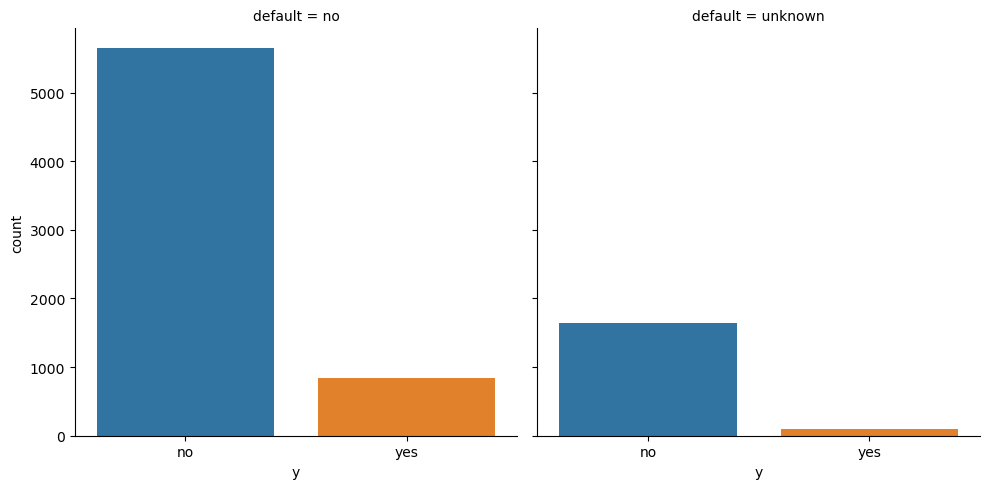

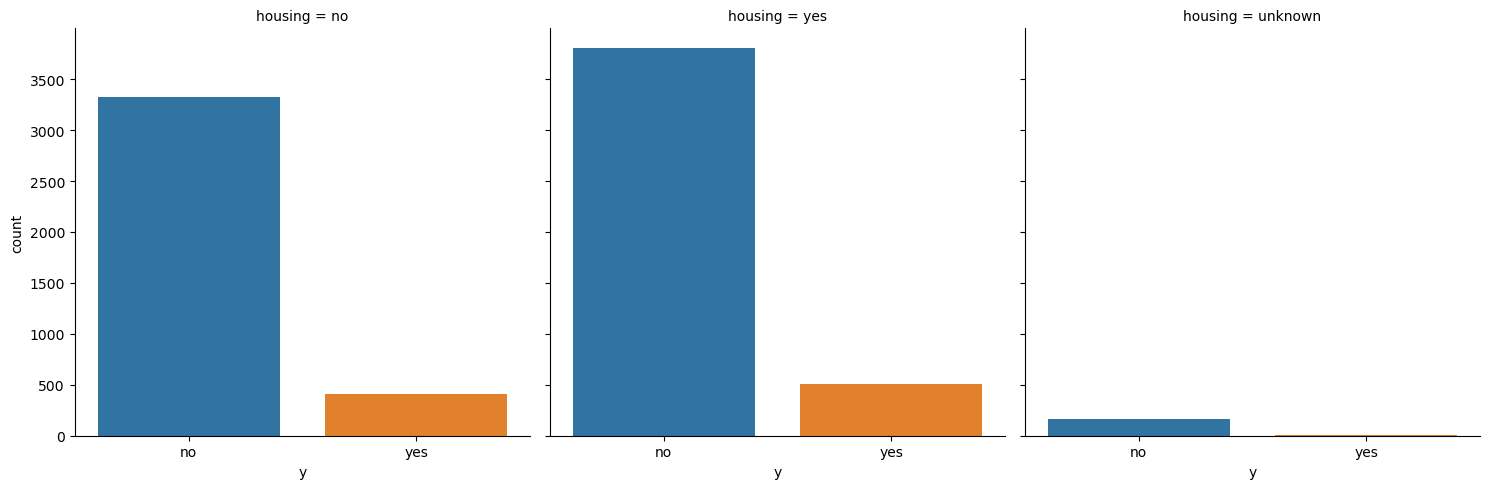

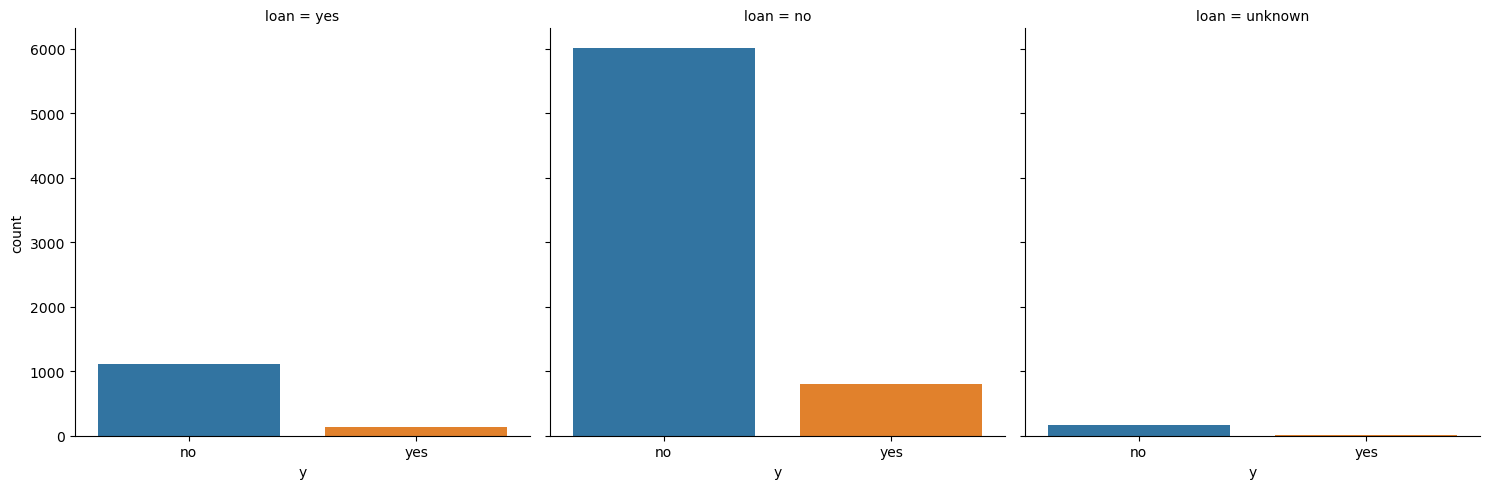

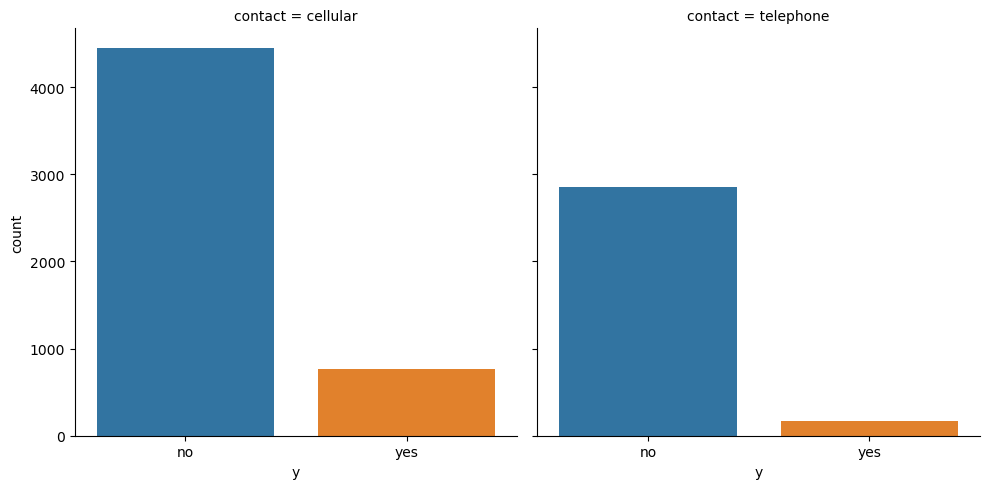

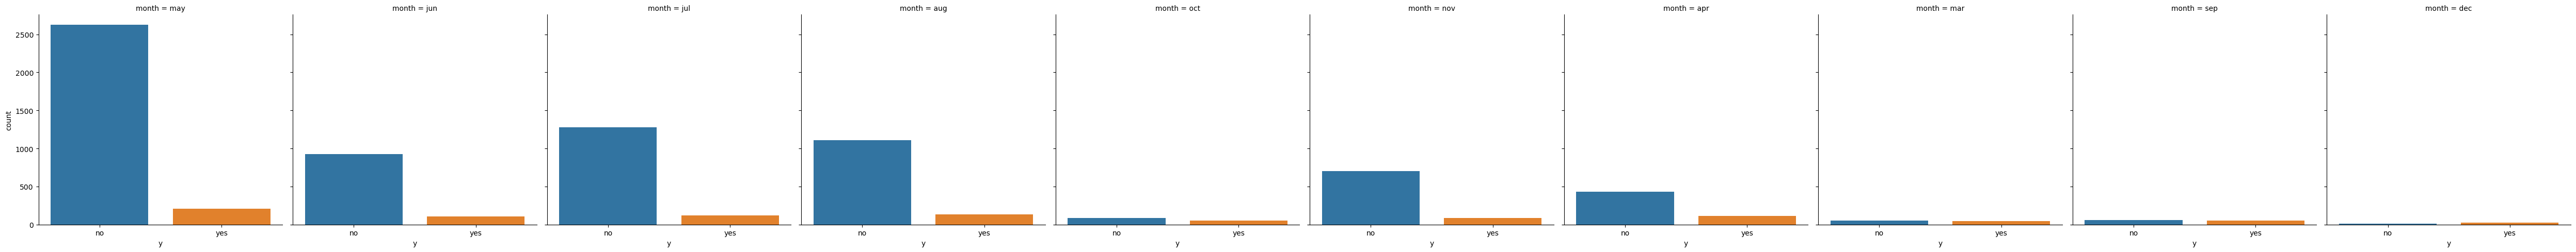

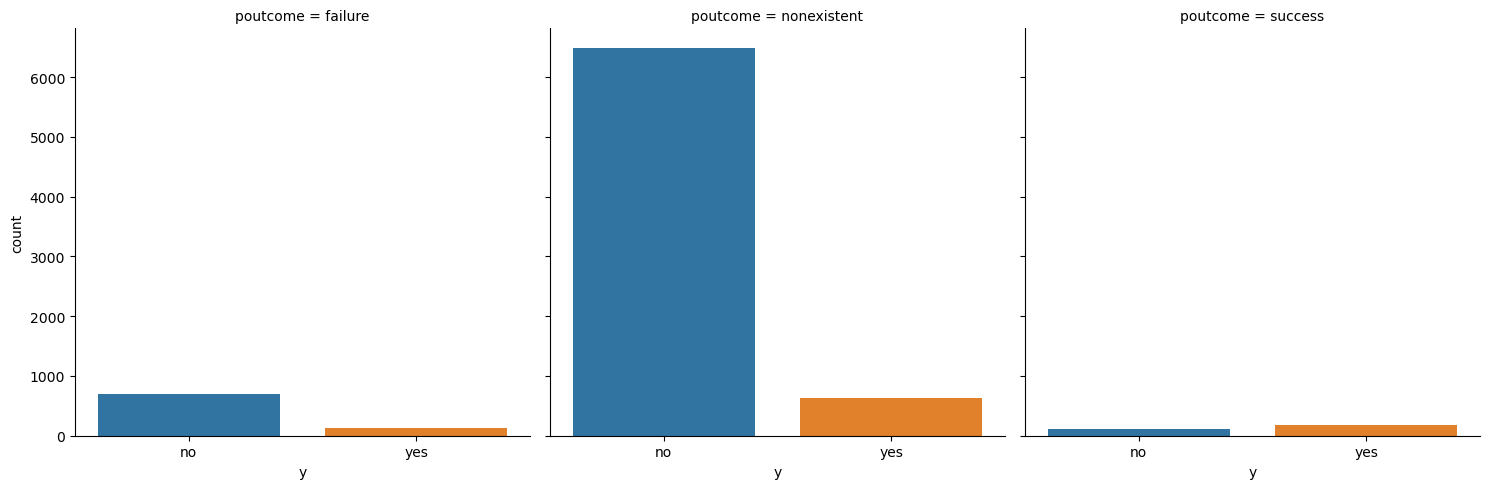

In [18]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= sampledbankmarketing)
plt.show()

In [19]:
#Check target variable split over categorical features and find the count
for categorical_feature in categorical_features:
    print(sampledbankmarketing.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           1816
     blue-collar      1697
     entrepreneur      284
     housemaid         170
     management        545
     retired           260
     self-employed     233
     services          698
     student           100
     technician       1258
     unemployed        185
     unknown            57
yes  admin.            278
     blue-collar       118
     entrepreneur       27
     housemaid          23
     management         69
     retired            97
     self-employed      35
     services           59
     student            54
     technician        133
     unemployed         31
     unknown            11
dtype: int64
y    marital 
no   divorced     789
     married     4585
     single      1914
     unknown       15
yes  divorced      90
     married      520
     single       321
     unknown        4
dtype: int64
y    education          
no   basic.4y                755
     basic.6y                401
     basic.9y             

### Explore the Numerical Features

In [20]:
# list of numerical variables
numerical_features = [feature for feature in sampledbankmarketing.columns if ((sampledbankmarketing[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
sampledbankmarketing[numerical_features].head()

Number of numerical variables:  11


,age,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
32884,57,1,371,1,999,1,-1.8,92.893,-46.2,1.299,5099.1
3169,55,4,285,2,999,0,1.1,93.994,-36.4,4.860,5191.0
32206,33,5,52,1,999,1,-1.8,92.893,-46.2,1.313,5099.1
9403,36,5,355,4,999,0,1.4,94.465,-41.8,4.967,5228.1
14020,27,5,189,2,999,0,1.4,93.918,-42.7,4.963,5228.1


### Checking for Discrete and Continuous Variables

In [21]:
discrete_features=[feature for feature in numerical_features if len(sampledbankmarketing[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_features)))

Discrete Variables Count: 5


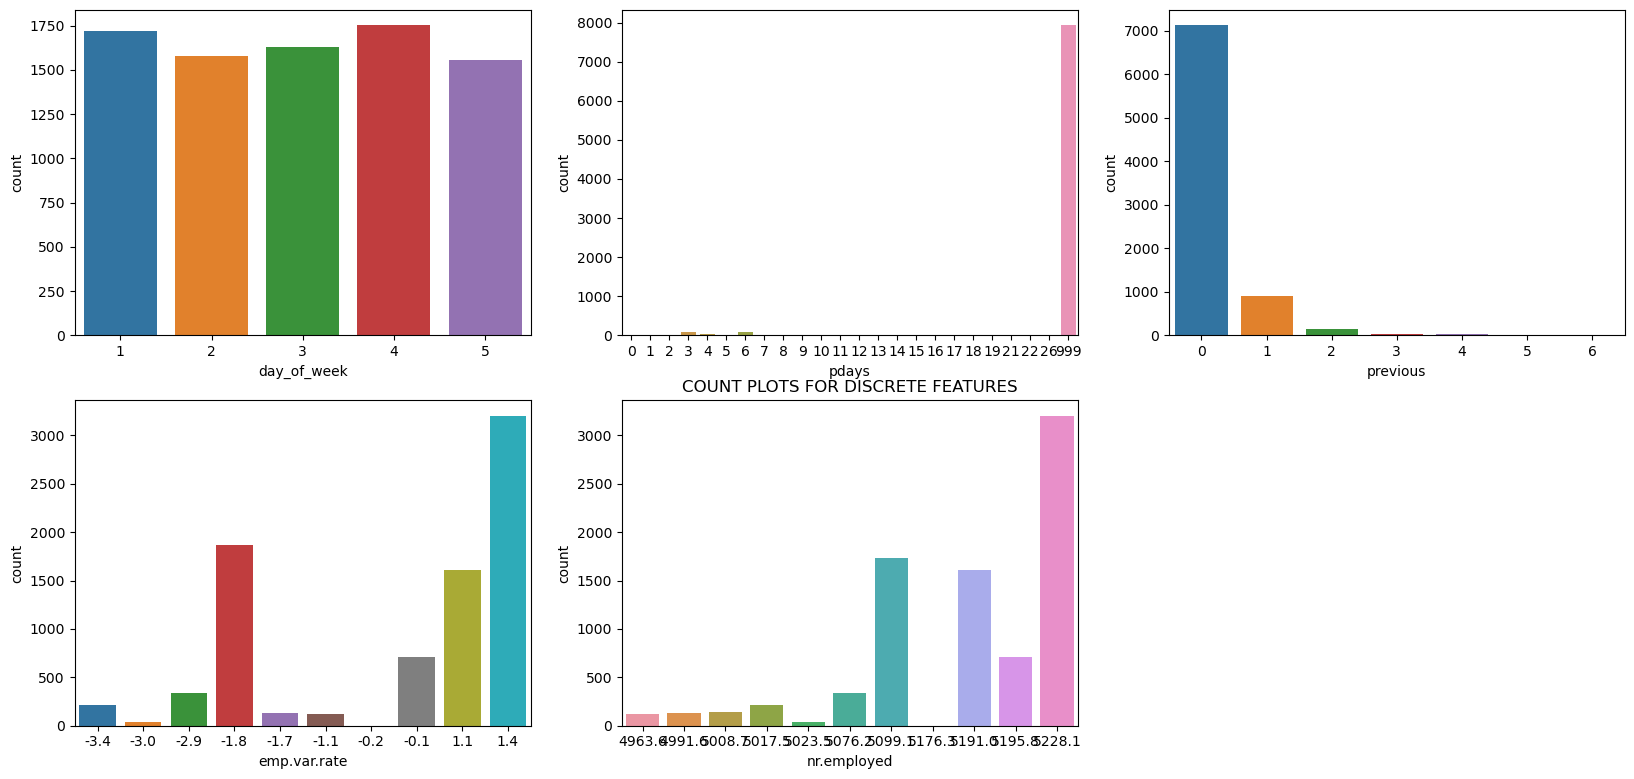

In [97]:
plt.figure(figsize=(20, 60), facecolor='white')
plotnumber = 1

for discrete_feature in discrete_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.countplot(x=sampledbankmarketing[discrete_feature])
    plt.xlabel(discrete_feature)
    plotnumber+= 1
plt.title('COUNT PLOTS FOR DISCRETE FEATURES')
plt.show()

In [23]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+['y']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 6


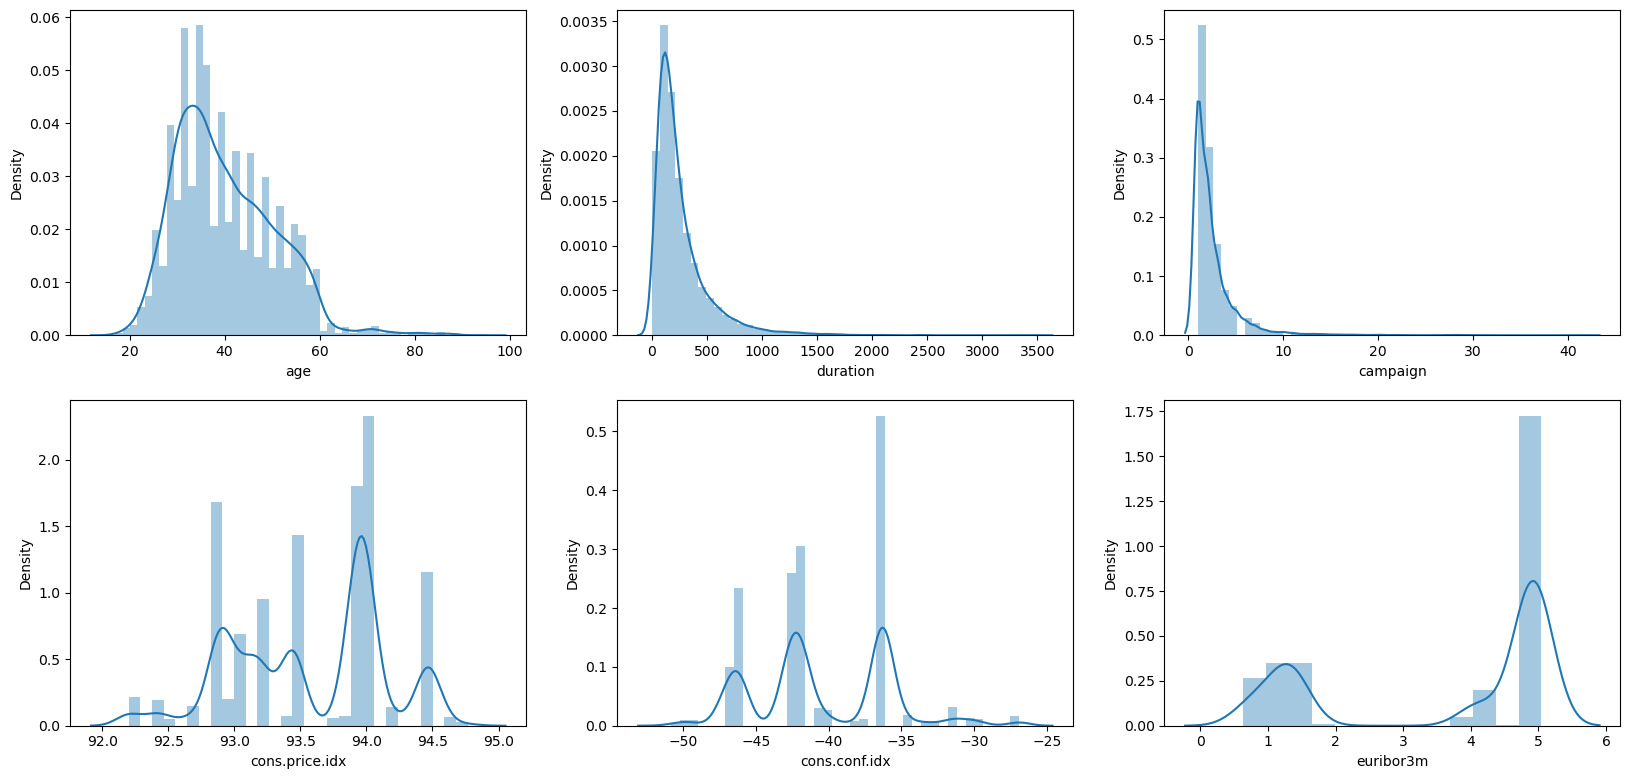

In [25]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+['y']]
print("Continuous feature Count {}".format(len(continuous_features)))

### Relationship Between numerical features and Target variable

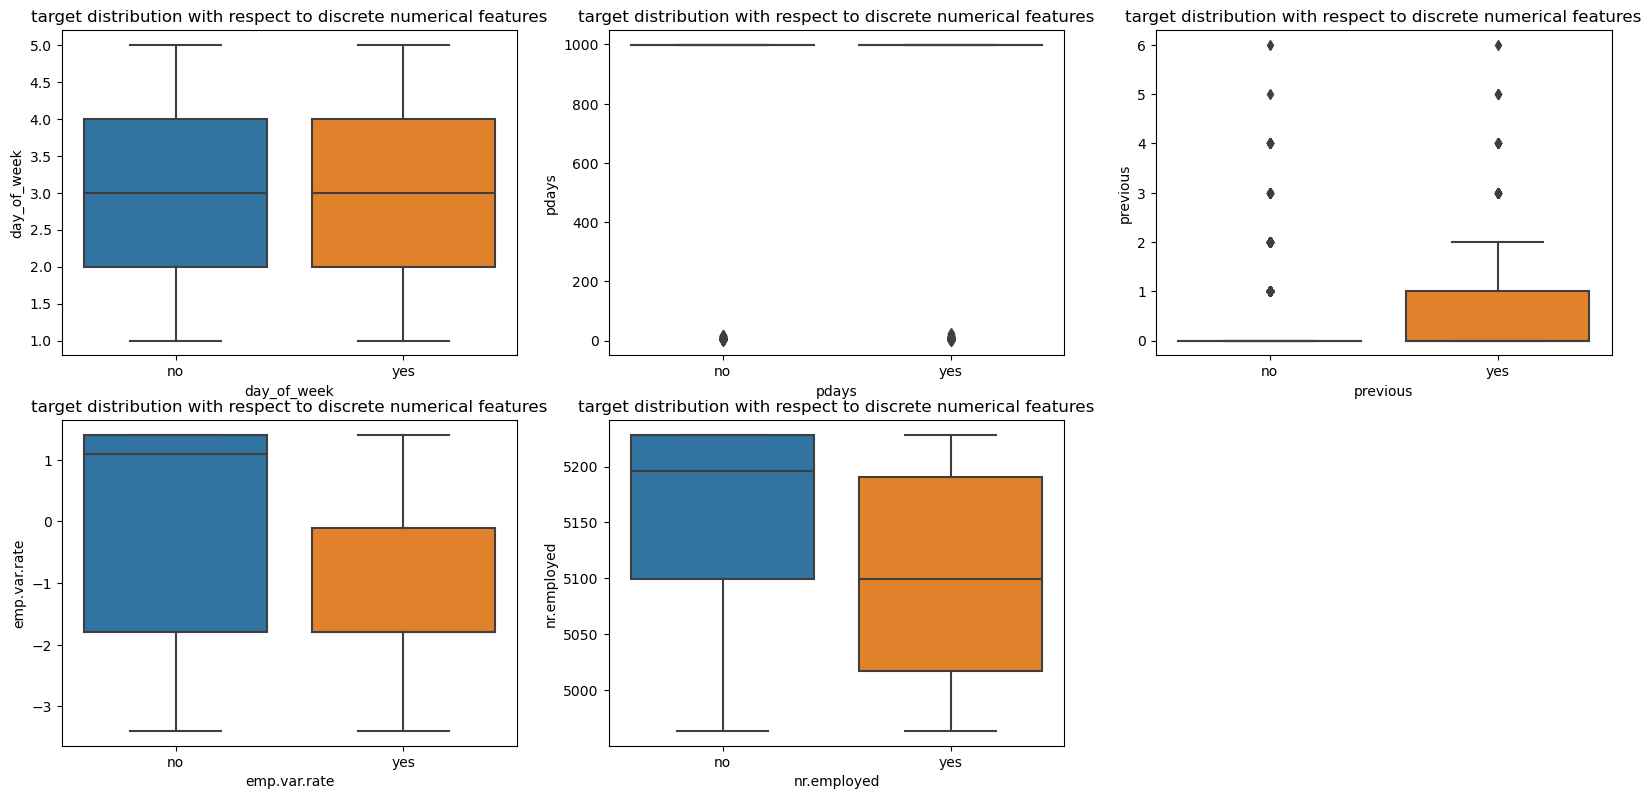

In [98]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in discrete_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= sampledbankmarketing[feature], data=sampledbankmarketing)
    plt.xlabel(feature)
    plotnumber+=1
    plt.title('target distribution with respect to discrete numerical features')
plt.show()


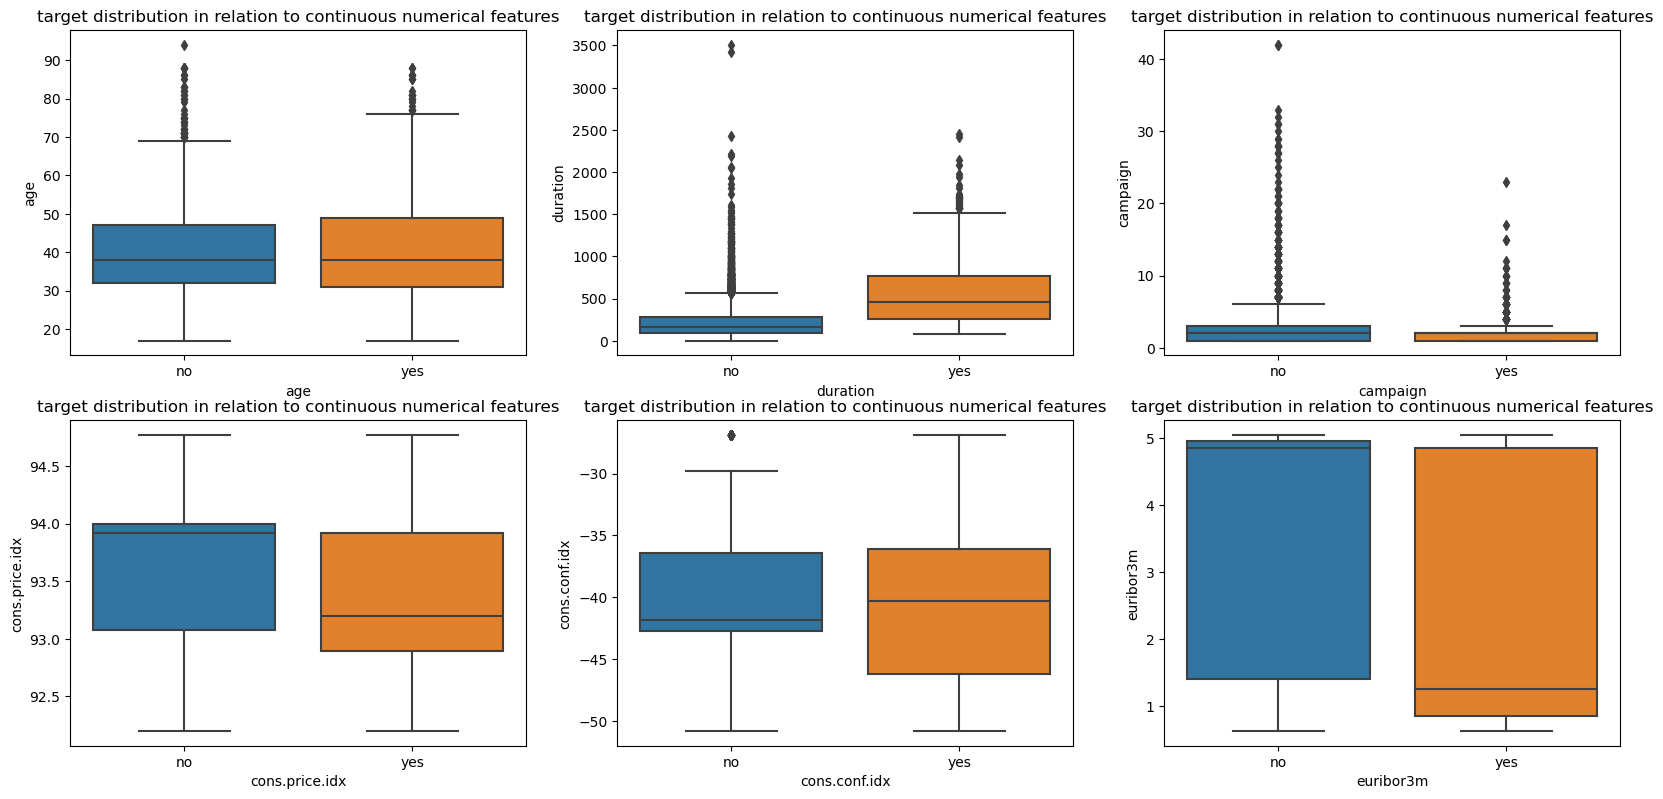

In [99]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= sampledbankmarketing[feature], data=sampledbankmarketing)
    plt.xlabel(feature)
    plotnumber+=1
    plt.title('target distribution in relation to continuous numerical features')
plt.show()


### Find Outliers in numerical features

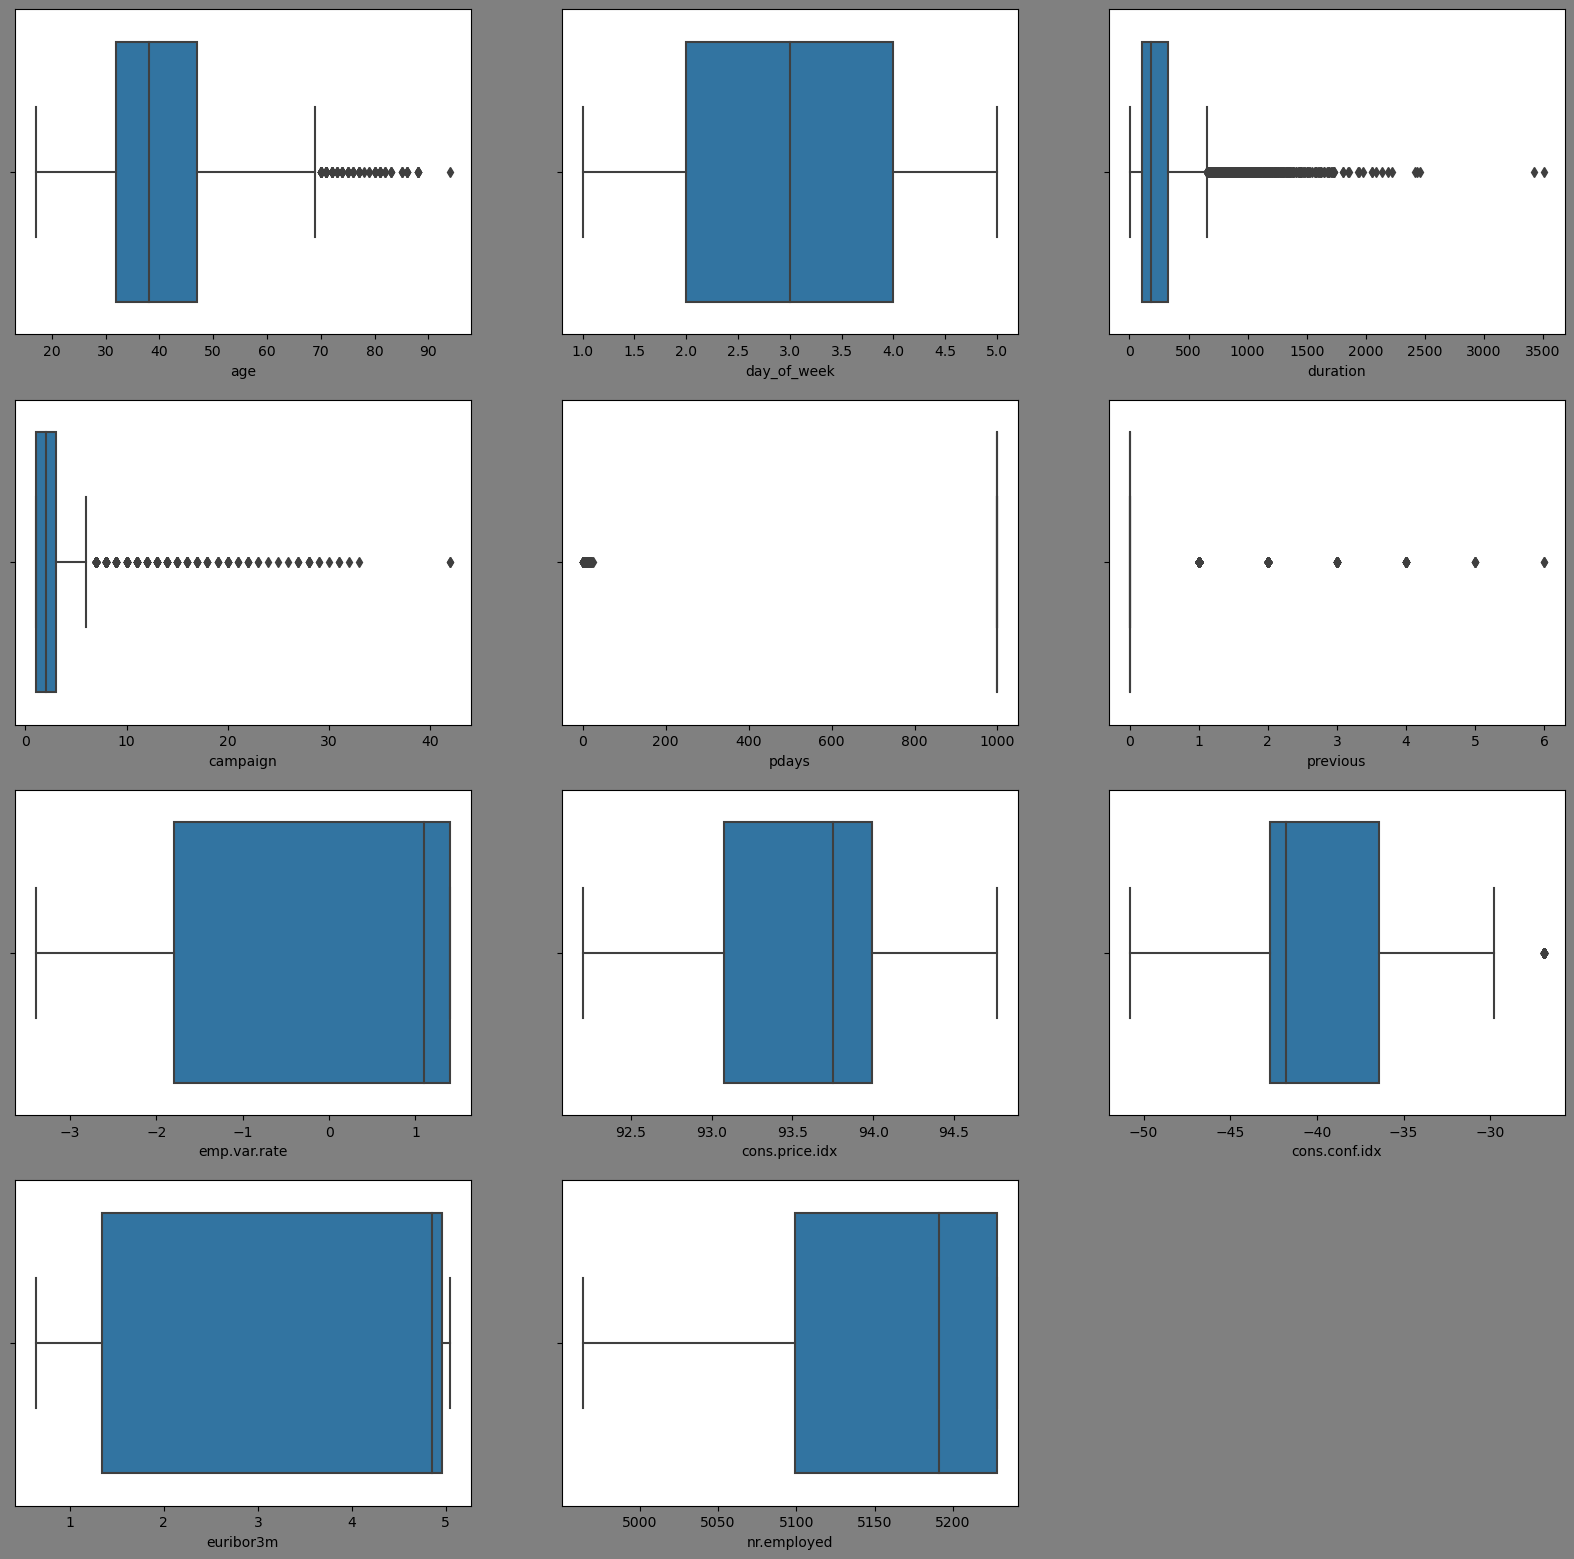

In [33]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='grey')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(sampledbankmarketing[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

### Explore the Correlation between numerical features

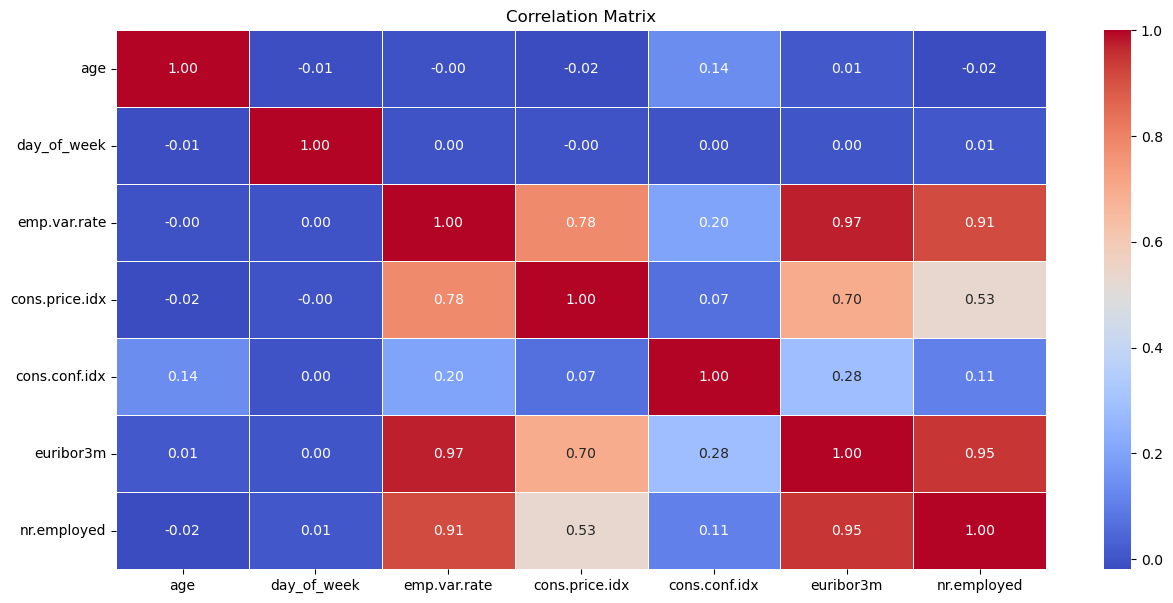

In [30]:
## Checking for correlation
numeric_columns = sampledbankmarketing.select_dtypes(include=['int64', 'float64']).columns
cor_mat = sampledbankmarketing[numeric_columns].corr()

fig = plt.figure(figsize=(15, 7))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


### Check the Data set is balanced or not based on target values in classification

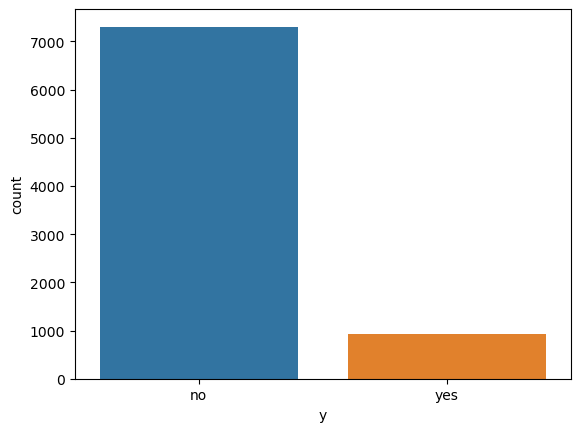

In [35]:
#total client count based on Deposit Variable Y
sns.countplot(x='y',data=sampledbankmarketing)
plt.show()

In [36]:
sampledbankmarketing['y'].groupby(sampledbankmarketing['y']).count()

y
no     7303
yes     935
Name: y, dtype: int64

In [37]:
sampledbankmarketing.dtypes

age                 Int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week         int64
duration            int32
campaign            int32
pdays               int32
previous            int32
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [38]:
def print_unique_col_values(sampledbankmarketing):
       for column in sampledbankmarketing:
            if sampledbankmarketing[column].dtypes=='object':
                print(f'{column}: {sampledbankmarketing[column].unique()}') 

In [100]:
#printing unique values for columns with object data type
print_unique_col_values(sampledbankmarketing)

job: ['technician' 'unknown' 'blue-collar' 'admin.' 'housemaid' 'retired'
 'services' 'entrepreneur' 'unemployed' 'management' 'self-employed'
 'student']
marital: ['married' 'divorced' 'single' 'unknown']
education: ['high.school' 'unknown' 'basic.9y' 'professional.course'
 'university.degree' 'basic.4y' 'basic.6y' 'illiterate']
default: ['no' 'unknown']
housing: ['no' 'yes' 'unknown']
loan: ['yes' 'no' 'unknown']
contact: ['cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'apr' 'mar' 'sep' 'dec']
poutcome: ['failure' 'nonexistent' 'success']
y: ['no' 'yes']


In [41]:
# Drop rows with 'unknown' values in 'default' and 'housing'
sampledbankmarketing1 = sampledbankmarketing[(sampledbankmarketing['default'] != 'unknown') & (sampledbankmarketing['housing'] != 'unknown')]

# Resetting the index after dropping rows
sampledbankmarketing1.reset_index(drop=True, inplace=True)


In [43]:
print_unique_col_values(sampledbankmarketing1)

job: ['technician' 'blue-collar' 'admin.' 'housemaid' 'retired' 'entrepreneur'
 'self-employed' 'services' 'management' 'student' 'unemployed' 'unknown']
marital: ['married' 'divorced' 'single' 'unknown']
education: ['high.school' 'basic.9y' 'professional.course' 'university.degree'
 'basic.4y' 'basic.6y' 'unknown' 'illiterate']
default: ['no']
housing: ['no' 'yes']
loan: ['yes' 'no']
contact: ['cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'mar' 'sep' 'apr' 'dec']
poutcome: ['failure' 'nonexistent' 'success']
y: ['no' 'yes']


### Converting 'NO' and 'YES' columns to '0' and '1'

In [44]:
yes_no_columns = ['default', 'housing', 'loan', 'y']

for col in yes_no_columns:
    sampledbankmarketing1[col].replace({'yes': 1, 'no': 0}, inplace=True)


In [45]:
for col in  sampledbankmarketing:
    print(f'{col}: { sampledbankmarketing1[col].unique()}') 

age: <IntegerArray>
[57, 33, 36, 27, 58, 24, 34, 42, 43, 56, 53, 37, 46, 30, 45, 31, 69, 26, 41,
 50, 25, 55, 39, 44, 63, 52, 35, 77, 32, 28, 40, 60, 29, 49, 38, 54, 47, 59,
 51, 81, 48, 70, 21, 22, 74, 80, 61, 68, 23, 71, 67, 65, 20, 19, 62, 66, 75,
 18, 72, 85, 88, 83, 78, 64, 17, 76, 73, 86, 79, 82, 94]
Length: 71, dtype: Int64
job: ['technician' 'blue-collar' 'admin.' 'housemaid' 'retired' 'entrepreneur'
 'self-employed' 'services' 'management' 'student' 'unemployed' 'unknown']
marital: ['married' 'divorced' 'single' 'unknown']
education: ['high.school' 'basic.9y' 'professional.course' 'university.degree'
 'basic.4y' 'basic.6y' 'unknown' 'illiterate']
default: [0]
housing: [0 1]
loan: [1 0]
contact: ['cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'mar' 'sep' 'apr' 'dec']
day_of_week: [1 5 3 4 2]
duration: [ 371   52  355  189  605  126   43  451  560  982  552  265  171  178
   92  399  101   60    9  119  140  649  911  835   49  289   94  201
   72    2  234 

In [46]:
print(sampledbankmarketing1.head())

   age          job  marital            education  default  housing  loan  \
0   57   technician  married          high.school        0        0     1   
1   33  blue-collar  married             basic.9y        0        0     0   
2   36       admin.  married          high.school        0        0     0   
3   27    housemaid  married          high.school        0        1     0   
4   58      retired  married  professional.course        0        1     1   

     contact month  day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may            1  ...         1    999         1      failure   
1   cellular   may            5  ...         1    999         1      failure   
2  telephone   jun            5  ...         4    999         0  nonexistent   
3   cellular   jul            5  ...         2    999         0  nonexistent   
4   cellular   jul            5  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m

In [47]:
## Converting The Contact method into binary
sampledbankmarketing1['contact'].replace({'cellular':1,'telephone':0},inplace=True)
sampledbankmarketing1.contact.unique()

array([1, 0], dtype=int64)

### encoding for categorical columns

In [48]:
sampledbankmarketing2= pd.get_dummies(data=sampledbankmarketing1, columns=['marital','job','education','month','poutcome'])
sampledbankmarketing2.columns

Index(['age', 'default', 'housing', 'loan', 'contact', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [49]:
sampledbankmarketing2.sample(5)

,age,default,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
1210,55,0,1,0,0,5,412,1,999,0,...,0,0,0,1,0,0,0,0,1,0
6009,60,0,0,0,1,3,576,1,999,0,...,0,0,0,0,0,0,0,0,1,0
6011,30,0,0,0,1,5,440,1,999,0,...,0,0,0,1,0,0,0,0,1,0
5877,52,0,0,0,1,1,445,1,999,0,...,1,0,0,0,0,0,0,0,1,0
2978,31,0,1,0,1,4,88,5,999,0,...,0,0,0,0,1,0,0,0,1,0


In [50]:
unique_age_values = sampledbankmarketing1['age'].unique()
print(unique_age_values)

<IntegerArray>
[57, 33, 36, 27, 58, 24, 34, 42, 43, 56, 53, 37, 46, 30, 45, 31, 69, 26, 41,
 50, 25, 55, 39, 44, 63, 52, 35, 77, 32, 28, 40, 60, 29, 49, 38, 54, 47, 59,
 51, 81, 48, 70, 21, 22, 74, 80, 61, 68, 23, 71, 67, 65, 20, 19, 62, 66, 75,
 18, 72, 85, 88, 83, 78, 64, 17, 76, 73, 86, 79, 82, 94]
Length: 71, dtype: Int64


In [51]:

# Assuming 'age' is the column containing your age values
bins = [0, 25, 35, 45, 55, 65, 75, 100]  # Define your age group bins as needed
labels = ['0-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-100']  # Labels for the age groups

# Create a new column 'age_group' in your DataFrame
sampledbankmarketing1['age_group'] = pd.cut(sampledbankmarketing1['age'], bins=bins, labels=labels, right=False)

# Print the DataFrame with the new 'age_group' column
print(sampledbankmarketing1[['age', 'age_group']])


      age age_group
0      57     56-65
1      33     26-35
2      36     36-45
3      27     26-35
4      58     56-65
...   ...       ...
6356   36     36-45
6357   41     36-45
6358   46     46-55
6359   31     26-35
6360   59     56-65

[6361 rows x 2 columns]


In [52]:
import statsmodels.api as sm

age_groups = sampledbankmarketing1['age_group'].unique()

for age_group in age_groups:
    # Subset data for the specific age group
    subset_data = sampledbankmarketing1[sampledbankmarketing1['age_group'] == age_group]

    # Create design matrix with contact as a predictor
    X = sm.add_constant(subset_data['contact'])

    # Fit logistic regression model
    logit_model = sm.Logit(subset_data['y'], X)
    result = logit_model.fit()

    # Print summary for each age group
    print(f"\nLogistic Regression Results for Age Group: {age_group}\n")
    print(result.summary())


Optimization terminated successfully.
         Current function value: 0.473782
         Iterations 6

Logistic Regression Results for Age Group: 56-65

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  466
Model:                          Logit   Df Residuals:                      464
Method:                           MLE   Df Model:                            1
Date:                Tue, 16 Jan 2024   Pseudo R-squ.:                 0.03455
Time:                        21:35:42   Log-Likelihood:                -220.78
converged:                       True   LL-Null:                       -228.68
Covariance Type:            nonrobust   LLR p-value:                 7.041e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3102      0.291     -7.945      0.000   

In [53]:
boolean_columns = ['marital_divorced', 'marital_married', 'marital_single', 'marital_unknown',
                    'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management',
                    'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician',
                    'job_unemployed', 'job_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
                    'education_high.school', 'education_illiterate', 'education_professional.course',
                    'education_university.degree', 'education_unknown', 'month_apr', 'month_aug', 'month_dec','month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']

for col in boolean_columns:
    sampledbankmarketing2[col] = sampledbankmarketing2[col].astype(int)


In [54]:
# scaling of columns 
cols_to_scale = ['age','duration','pdays','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sampledbankmarketing2[cols_to_scale] = scaler.fit_transform(sampledbankmarketing2[cols_to_scale])

In [55]:
for col in sampledbankmarketing2:
    print(f'{col}: {sampledbankmarketing2[col].unique()}')

age: [0.51948052 0.20779221 0.24675325 0.12987013 0.53246753 0.09090909
 0.22077922 0.32467532 0.33766234 0.50649351 0.46753247 0.25974026
 0.37662338 0.16883117 0.36363636 0.18181818 0.67532468 0.11688312
 0.31168831 0.42857143 0.1038961  0.49350649 0.28571429 0.35064935
 0.5974026  0.45454545 0.23376623 0.77922078 0.19480519 0.14285714
 0.2987013  0.55844156 0.15584416 0.41558442 0.27272727 0.48051948
 0.38961039 0.54545455 0.44155844 0.83116883 0.4025974  0.68831169
 0.05194805 0.06493506 0.74025974 0.81818182 0.57142857 0.66233766
 0.07792208 0.7012987  0.64935065 0.62337662 0.03896104 0.02597403
 0.58441558 0.63636364 0.75324675 0.01298701 0.71428571 0.88311688
 0.92207792 0.85714286 0.79220779 0.61038961 0.         0.76623377
 0.72727273 0.8961039  0.80519481 0.84415584 1.        ]
default: [0]
housing: [0 1]
loan: [1 0]
contact: [1 0]
day_of_week: [1 5 3 4 2]
duration: [1.05218135e-01 1.42571999e-02 1.00655831e-01 5.33219276e-02
 1.71941831e-01 3.53578557e-02 1.16909039e-02 1.28

### Train test split

In [56]:
## dropping the target variable
X = sampledbankmarketing2.drop('y',axis='columns')
y = testLabels = sampledbankmarketing2.y.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [57]:
y_train.value_counts()

0.0    4421
1.0     667
Name: y, dtype: int64

In [58]:
y.value_counts()

0.0    5527
1.0     834
Name: y, dtype: int64

In [59]:
y_test.value_counts()

0.0    1106
1.0     167
Name: y, dtype: int64

In [64]:
X_train.shape

(5088, 52)

In [65]:
X_test.shape

(1273, 52)

In [66]:
X_train[:10]

,age,default,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
5249,0.181818,0,1,0,1,4,0.262903,0.048780,1.000000,0,...,0,0,0,1,0,0,0,0,1,0
1407,0.285714,0,0,0,1,1,0.049045,0.000000,0.003003,1,...,0,0,1,0,0,0,0,0,0,1
3330,0.220779,0,0,0,1,5,0.085258,0.048780,1.000000,0,...,0,0,1,0,0,0,0,0,1,0
2796,0.207792,0,0,0,1,1,0.057884,0.000000,1.000000,0,...,0,0,0,1,0,0,0,0,1,0
5542,0.259740,0,0,0,0,5,0.038209,0.000000,1.000000,0,...,0,0,0,1,0,0,0,0,1,0
5178,0.480519,0,1,1,0,1,0.007414,0.170732,1.000000,0,...,0,1,0,0,0,0,0,0,1,0
632,0.259740,0,0,1,1,2,0.026804,0.024390,1.000000,0,...,1,0,0,0,0,0,0,0,1,0
5640,0.116883,0,0,0,0,3,0.024237,0.097561,1.000000,0,...,0,0,0,1,0,0,0,0,1,0
4388,0.181818,0,0,0,0,2,0.019390,0.170732,1.000000,0,...,0,1,0,0,0,0,0,0,1,0
3686,0.571429,0,1,0,1,3,0.031651,0.000000,1.000000,0,...,0,0,0,1,0,0,0,0,1,0


### Mitigating Skewdness of Data: Undersampling

In [67]:
# Class count
count_class_0, count_class_1 = sampledbankmarketing1.y.value_counts()

# Divide by class
BankMarketing_class_0 = sampledbankmarketing2[sampledbankmarketing2['y'] == 0]
BankMarketing_class_1 = sampledbankmarketing2[sampledbankmarketing2['y'] == 1]


In [68]:
# Undersample 0-class and concat the DataFrames of both class
BankMarketing_class_0_under = BankMarketing_class_0.sample(count_class_1)
BankMarketing_test_under = pd.concat([BankMarketing_class_0_under, BankMarketing_class_1], axis=0)

print('Random under-sampling:')
print(BankMarketing_test_under.y.value_counts())

Random under-sampling:
0    834
1    834
Name: y, dtype: int64


### Splitting into test and train data

In [72]:
X = BankMarketing_test_under.drop('y',axis='columns')
y = BankMarketing_test_under['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [73]:
# Number of classes in training Data
y_train.value_counts()

1    667
0    667
Name: y, dtype: int64

### Building a Logistic Regression Model to check for significance

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Choosing a classification algorithm (Logistic Regression in this case)
model = LogisticRegression()
model.fit(X_train, y_train)

# Access the coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Display the coefficients
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef:.4f}")

# Display the intercept
print(f"Intercept: {intercept:.4f}")


age: 0.0431
default: 0.0000
housing: -0.1731
loan: -0.3611
contact: 0.2599
day_of_week: 0.0652
duration: 10.4250
campaign: -0.7487
pdays: -1.3526
previous: -0.0759
emp.var.rate: -1.5991
cons.price.idx: 0.0743
cons.conf.idx: 0.5825
euribor3m: -0.4442
nr.employed: -1.3104
marital_divorced: -0.5719
marital_married: -0.0056
marital_single: 0.0250
marital_unknown: 0.5527
job_admin.: -0.0493
job_blue-collar: -0.4364
job_entrepreneur: 0.0353
job_housemaid: -0.3470
job_management: 0.0140
job_retired: 0.8638
job_self-employed: -0.2189
job_services: -0.1850
job_student: 0.4273
job_technician: -0.3507
job_unemployed: -0.1188
job_unknown: 0.3659
education_basic.4y: -0.3139
education_basic.6y: -0.3433
education_basic.9y: -0.3913
education_high.school: 0.0026
education_illiterate: 0.1854
education_professional.course: 0.1062
education_university.degree: 0.0121
education_unknown: 0.7426
month_apr: -0.0356
month_aug: -0.1151
month_dec: 0.2837
month_jul: -0.1188
month_jun: -0.1364
month_mar: 0.6501
mon

In [75]:
# Display odds ratios
for feature, coef in zip(X_train.columns, coefficients):
    odds_ratio = np.exp(coef)
    print(f"Odds ratio for {feature}: {odds_ratio:.4f}")


Odds ratio for age: 1.0440
Odds ratio for default: 1.0000
Odds ratio for housing: 0.8410
Odds ratio for loan: 0.6969
Odds ratio for contact: 1.2968
Odds ratio for day_of_week: 1.0673
Odds ratio for duration: 33692.1763
Odds ratio for campaign: 0.4730
Odds ratio for pdays: 0.2586
Odds ratio for previous: 0.9269
Odds ratio for emp.var.rate: 0.2021
Odds ratio for cons.price.idx: 1.0771
Odds ratio for cons.conf.idx: 1.7905
Odds ratio for euribor3m: 0.6413
Odds ratio for nr.employed: 0.2697
Odds ratio for marital_divorced: 0.5645
Odds ratio for marital_married: 0.9945
Odds ratio for marital_single: 1.0253
Odds ratio for marital_unknown: 1.7380
Odds ratio for job_admin.: 0.9519
Odds ratio for job_blue-collar: 0.6464
Odds ratio for job_entrepreneur: 1.0360
Odds ratio for job_housemaid: 0.7068
Odds ratio for job_management: 1.0141
Odds ratio for job_retired: 2.3723
Odds ratio for job_self-employed: 0.8034
Odds ratio for job_services: 0.8311
Odds ratio for job_student: 1.5332
Odds ratio for job

In [76]:
# Evaluate Model Performance
y_pred = model.predict(X_test)

In [77]:
# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [78]:
# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.8443
Precision: 0.8324
Recall: 0.8623
F1-Score: 0.8471


### Data Insights

In [81]:
# using the below two models that are RandomForestClassifier and XGBClassifier
!pip install xgboost
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

     ---------------------------------------- 99.8/99.8 MB 1.3 MB/s eta 0:00:00


In [82]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())


[0.91011236 0.88389513 0.86142322 0.87640449 0.84962406]
0.8762918532285771


In [83]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())


[0.91385768 0.87265918 0.88014981 0.89138577 0.87593985]
0.8867984568161977


In [84]:
#creating parameters
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}


In [89]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })
    scores

In [90]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.8105482728237219,
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'auto',
   'n_estimators': 50}},
 {'model': 'XGBClassifier',
  'best_score': 0.8938896980813148,
  'best_params': {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100}}]

### Model Building

In [91]:
#as per above results, xgboost gives best result and hence selecting same to model building...
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [92]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [93]:
model_xgb.score(X_test,y_test)

0.8892215568862275

### Feature Importance

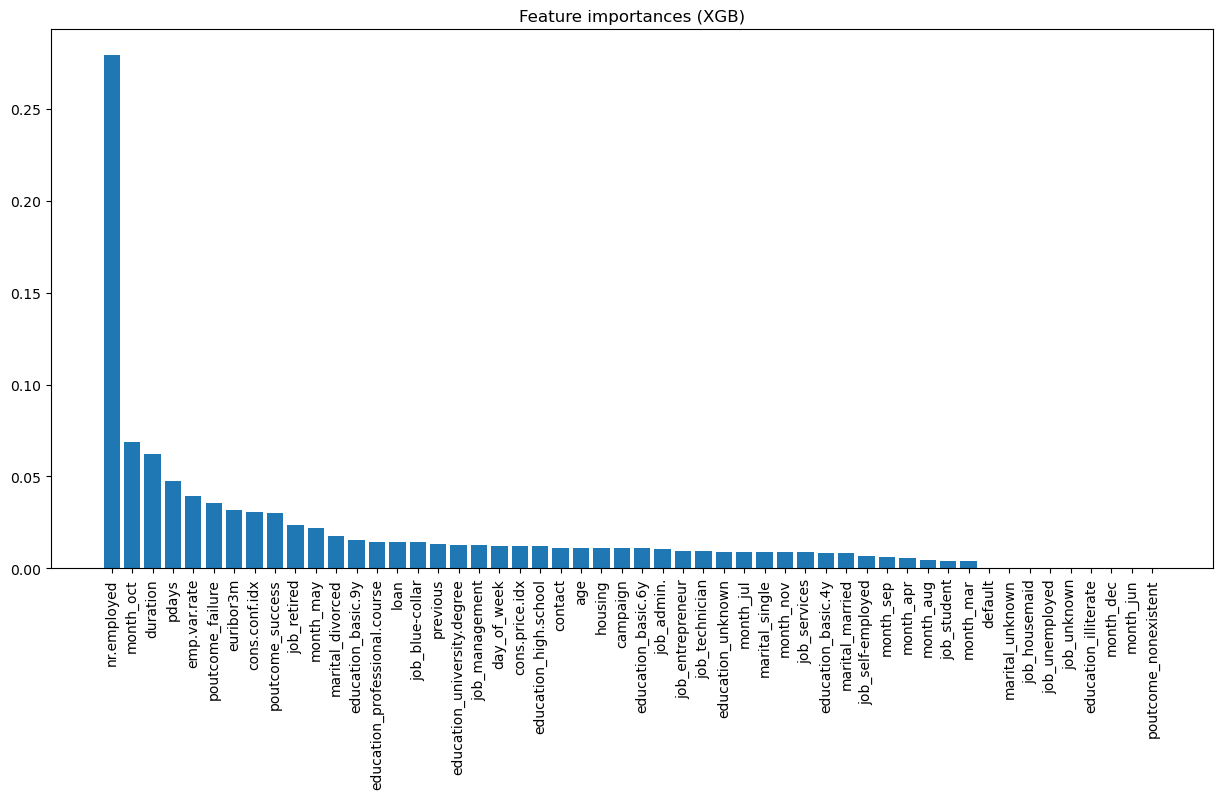

In [94]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

In [95]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[146,  21],
       [ 16, 151]], dtype=int64)

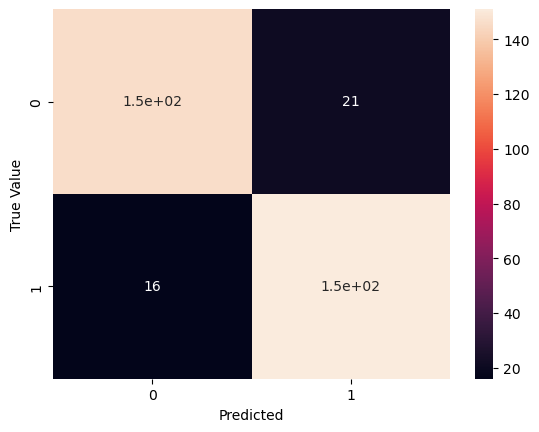

In [96]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()